### **Find this one the given tasks and Visualize it:**

- Find the highest paid employees.

- Compare Police vs Fire Department salaries.

- Analyze the impact of overtime pay.

- Detect missing values (NaNs) in Benefits.

- Find average salary by JobTitle or by Year.

In [115]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [116]:
# load data
df = pd.read_csv('Salaries.csv')

/var/folders/3r/yggkbbhn2zx2q7qwlxbp6dkw0000gn/T/ipykernel_723/382579703.py:2: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [118]:
df.describe(include='all')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148049.0,148654.0,148654.0,112495.0,148654.000000,148654.000000,148654.000000,0.0,148654,38119
unique,NaN,110811,2159,109900.0,66555.0,84968.0,99635.0,NaN,NaN,NaN,NaN,1,2
top,NaN,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,San Francisco,FT
freq,NaN,13,7036,875.0,66103.0,35218.0,1053.0,NaN,NaN,NaN,NaN,148654,22334
mean,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [119]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [121]:
df.describe(include = 'all')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148049.0,148654.0,148654.0,112495.0,148654.000000,148654.000000,148654.000000,0.0,148654,38119
unique,NaN,110811,2159,109900.0,66555.0,84968.0,99635.0,NaN,NaN,NaN,NaN,1,2
top,NaN,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,San Francisco,FT
freq,NaN,13,7036,875.0,66103.0,35218.0,1053.0,NaN,NaN,NaN,NaN,148654,22334
mean,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [122]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [123]:
# dropping ID, Notes, Agency & Status columns 
df = df.drop(['Id', 'Notes', 'Agency', 'Status'], axis = 1)

In [124]:
# dropping null rows of BasePay
df.dropna(subset = ['BasePay'], inplace = True)

In [125]:
# ensuring numeric BasePay -> converting object strings to numeric like BasePay, etc.
obj_to_num_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col1 in obj_to_num_cols:
    df[col1] = pd.to_numeric(df[col1], errors = 'coerce')

In [126]:
df[col1].value_counts()

Benefits
0.00        1596
4659.36      107
25699.20      83
37055.22      82
27052.98      75
            ... 
1.21           1
53102.29       1
1.12           1
20.49          1
69810.19       1
Name: count, Length: 98363, dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148049 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148049 non-null  object 
 1   JobTitle          148049 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148045 non-null  float64
 4   OtherPay          148045 non-null  float64
 5   Benefits          111886 non-null  float64
 6   TotalPay          148049 non-null  float64
 7   TotalPayBenefits  148049 non-null  float64
 8   Year              148049 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 11.3+ MB


In [128]:
# dropping BasePay, OvertimePay & OtherPay empty rows from dataframe
df.dropna(subset = ['BasePay', 'OvertimePay', 'OtherPay'], inplace=True)

In [129]:
# filling 36,159 missing values of 'Benefits' with 0
df['Benefits'] = df['Benefits'].fillna(0)

In [130]:
print(df.shape)
df.isnull().sum()

(148045, 9)


EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [131]:
# displaying all employee names from fire department
df[df['JobTitle'].str.contains('fire', case=False)]['EmployeeName']

4            PATRICK GARDNER
6                  ALSON LEE
8             MICHAEL MORRIS
9         JOANNE HAYES-WHITE
10             ARTHUR KENNEY
                 ...        
145956      Kenneth C Farris
147556         Edward A Dunn
148021        Kari A Johnson
148209          Sheryl K Lee
148554       Lawrence F Gatt
Name: EmployeeName, Length: 5858, dtype: object

In [132]:
df[df['BasePay'] < 0]           # 11 rows have negative BasePay

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
72832,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012
72865,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012
72872,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012
72874,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012
72878,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012
72884,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012
72888,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012
72894,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012
72908,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012
72920,Charles Williams,Junior Clerk,-30.58,45.87,0.0,1.36,15.29,16.65,2012


In [133]:
# finding minimum, maximum & average BasePay
min_BasePay = df['BasePay'].min()
max_BasePay = df['BasePay'].max()
avg_BasePay = df['BasePay'].mean().round(2)

print(f"Minimum BasePay:", min_BasePay)
print(f"Maximum BasePay:", max_BasePay)
print(f"Average BasePay:", avg_BasePay)

Minimum BasePay: -166.01
Maximum BasePay: 319275.01
Average BasePay: 66325.45


In [134]:
# replace 'Not Provided' in EmployeeName to NaN
count_of_notprovided = (df['EmployeeName'].str.lower() == 'not provided').sum()
print("Count of 'Not Provided':", count_of_notprovided)

Count of 'Not Provided': 2


In [135]:
df['EmployeeName'].replace(r'(?i)not provided', np.nan, regex = True, inplace = True)
print("Missing names after replacement:", df['EmployeeName'].isna().sum())

# we will not drop missing name's rows as they are categoral, not numerical so their mssing will not affect the analysis

Missing names after replacement: 2


In [136]:
# find jobtitle of ALBERT PARDINI
df[df['EmployeeName'].str.lower() == 'albert pardini']['JobTitle']

2        CAPTAIN III (POLICE DEPARTMENT)
36519                          Captain 3
Name: JobTitle, dtype: object

In [137]:
# how much ALBERT PARDINI makes? (including benefits)
alberts_total_pay = df[df['EmployeeName'].str.lower() == 'albert pardini']['TotalPayBenefits'].sum()
print("Albert Pardini makes: ", alberts_total_pay)

Albert Pardini makes:  589275.2


In [138]:
# name the person having highest basepay
highest_basepay = df['BasePay'].max()
highest_basepay_person = df[df['BasePay'] == highest_basepay]['EmployeeName']
print("Person having highest base pay:", highest_basepay_person.values[0])
print("Highest base pay:", highest_basepay)

Person having highest base pay: Gregory P Suhr
Highest base pay: 319275.01


In [139]:
# unique job titles
print("Unique job titles:", df['JobTitle'].nunique())

# total number of job titles contain Captain
job_captain = df[df['JobTitle'].str.contains('Captain', case = False)].count()
print('Number of job titles contain CAPTAIN:' , job_captain.iloc[0])

Unique job titles: 2154
Number of job titles contain CAPTAIN: 551


In [140]:
# average basepay of all employees per year
df.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [141]:
# average base pay of all employees per job title
df.groupby('JobTitle')['BasePay'].mean()

JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2154, dtype: float64

In [142]:
# average base pay of all employees having job title 'ACCOUNTANT'
avg_basepay_accountant = df[df['JobTitle'].str.upper() == 'ACCOUNTANT']['BasePay'].mean()
print("Average BasePay of accountant:", avg_basepay_accountant)

Average BasePay of accountant: 46643.172


In [143]:
# groupby year, by keeping it as int
avg_basepay_per_year = df.groupby('Year')['BasePay'].mean()
print(avg_basepay_per_year)

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


### **Visualization:**

- Find the highest paid employees.

- Compare Police vs Fire Department salaries.

- Analyze the impact of overtime pay.

- Detect missing values (NaNs) in Benefits.

- Find average salary by JobTitle or by Year.

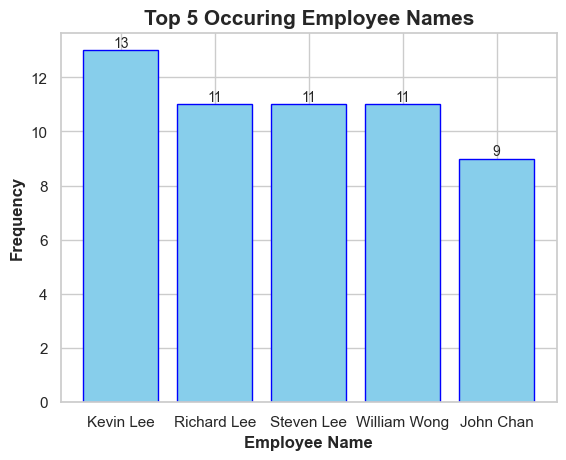

In [144]:
# top 5 occurance of employee's names
top_occuring_names = df['EmployeeName'].value_counts().head(5)

sns.set_theme(style = 'whitegrid')
bars = plt.bar(top_occuring_names.index , top_occuring_names.values, color = 'skyblue', edgecolor = 'blue') 

plt.title("Top 5 Occuring Employee Names", weight = 'bold', fontsize = 15)
plt.xlabel('Employee Name', weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             height,   # position
             str(height), 
             ha='center', 
             va='bottom', 
             fontsize=10)

plt.show()